In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.tree import plot_tree
from matplotlib.patches import Rectangle
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification

### SVM Data Prep

In [15]:
df = pd.read_csv('FINAL_FINAL.csv')
df = df[['Event number of finishers', 'distance_range', 'age_at_race', 'hours', 'avgtemp', 'Elevation gain']]

df = df[df['distance_range'].isin(['91-120', '71-90'])]


df['distance_range'].value_counts()
df.dropna(inplace= True)
df.isna().value_counts()

#Encoding Label, 0 now corresponds to 50mi race 1 corresponds to 100 km race
y = df['distance_range']
le = LabelEncoder()
y = le.fit_transform(y)

# X is the rest of the DF
X = df.drop('distance_range', axis=1)

#Splitting into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 69)
X_train = X_train.astype(float)



In [16]:
df.to_csv("FINAL_svm.csv", index=False)
X_train.to_csv("svm_Xtrain.csv", index=False)
X_test.to_csv("svm_Xtest.csv", index=False)

### Polynomial Degree 3

Accuracy: 0.7252747252747253
              precision    recall  f1-score   support

       71-90       1.00      0.46      0.63       918
      91-120       0.64      1.00      0.78       902

    accuracy                           0.73      1820
   macro avg       0.82      0.73      0.70      1820
weighted avg       0.82      0.73      0.70      1820



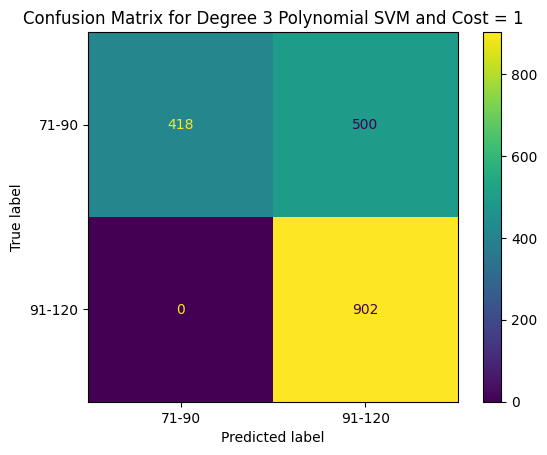

In [17]:
# Training Degree 2 Polynomial SVM
poly_svm = SVC(kernel='poly', degree = 3, C= 1)
poly_svm.fit(X_train, y_train)

# Predicting test set
poly_y_pred = poly_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, poly_y_pred))
print(classification_report(y_test, poly_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, poly_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Degree 3 Polynomial SVM and Cost = 1")
plt.show()

Accuracy: 0.823076923076923
              precision    recall  f1-score   support

       71-90       1.00      0.65      0.79       918
      91-120       0.74      1.00      0.85       902

    accuracy                           0.82      1820
   macro avg       0.87      0.82      0.82      1820
weighted avg       0.87      0.82      0.82      1820



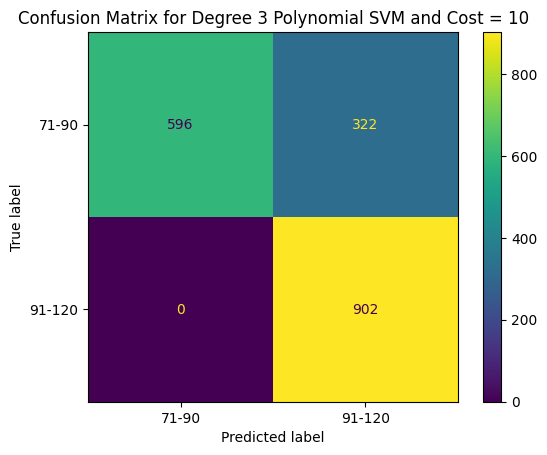

In [18]:
# Training Degree 3 Polynomial SVM
poly_svm = SVC(kernel='poly', degree = 3, C= 10)
poly_svm.fit(X_train, y_train)

# Predicting test set
poly_y_pred = poly_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, poly_y_pred))
print(classification_report(y_test, poly_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, poly_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Degree 3 Polynomial SVM and Cost = 10")
plt.show()

Accuracy: 0.5291208791208791
              precision    recall  f1-score   support

       71-90       0.55      0.37      0.44       918
      91-120       0.52      0.69      0.59       902

    accuracy                           0.53      1820
   macro avg       0.53      0.53      0.52      1820
weighted avg       0.53      0.53      0.52      1820



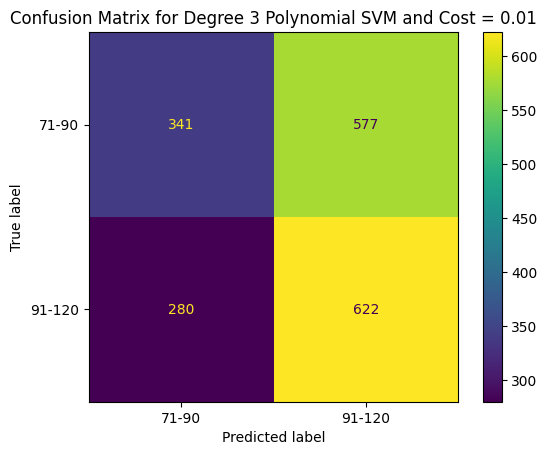

In [19]:
# Training Degree 3 Polynomial SVM
poly_svm = SVC(kernel='poly', degree = 3, C= 0.01)
poly_svm.fit(X_train, y_train)

# Predicting test set
poly_y_pred = poly_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, poly_y_pred))
print(classification_report(y_test, poly_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, poly_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Degree 3 Polynomial SVM and Cost = 0.01")
plt.show()

### Polynomial degree 2

Accuracy: 0.6961538461538461
              precision    recall  f1-score   support

       71-90       0.96      0.42      0.58       918
      91-120       0.62      0.98      0.76       902

    accuracy                           0.70      1820
   macro avg       0.79      0.70      0.67      1820
weighted avg       0.79      0.70      0.67      1820



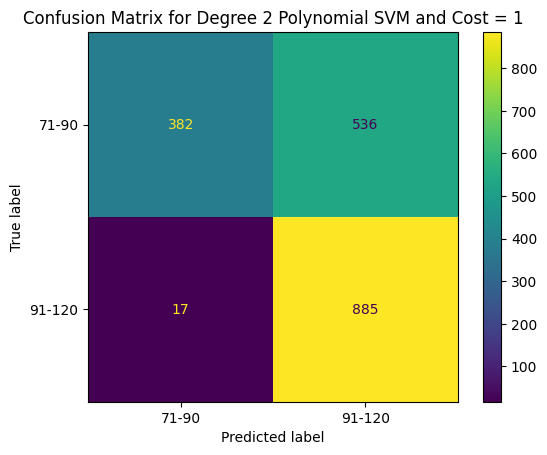

In [20]:
# Training Degree 2 Polynomial SVM
poly_svm = SVC(kernel='poly', degree = 2, C= 1)
poly_svm.fit(X_train, y_train)

# Predicting test set
poly_y_pred = poly_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, poly_y_pred))
print(classification_report(y_test, poly_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, poly_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Degree 2 Polynomial SVM and Cost = 1")
plt.show()

Accuracy: 0.7554945054945055
              precision    recall  f1-score   support

       71-90       0.83      0.65      0.73       918
      91-120       0.71      0.86      0.78       902

    accuracy                           0.76      1820
   macro avg       0.77      0.76      0.75      1820
weighted avg       0.77      0.76      0.75      1820



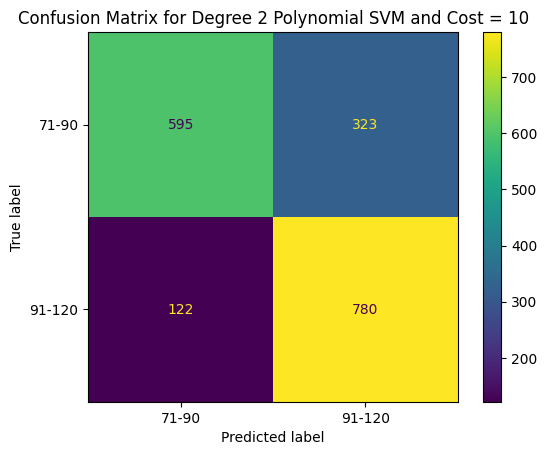

In [21]:
# Training Degree 2 Polynomial SVM
poly_svm = SVC(kernel='poly', degree = 2, C= 10)
poly_svm.fit(X_train, y_train)

# Predicting test set
poly_y_pred = poly_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, poly_y_pred))
print(classification_report(y_test, poly_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, poly_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Degree 2 Polynomial SVM and Cost = 10")
plt.show()

Accuracy: 0.7357142857142858
              precision    recall  f1-score   support

       71-90       0.79      0.65      0.71       918
      91-120       0.70      0.82      0.76       902

    accuracy                           0.74      1820
   macro avg       0.74      0.74      0.73      1820
weighted avg       0.74      0.74      0.73      1820



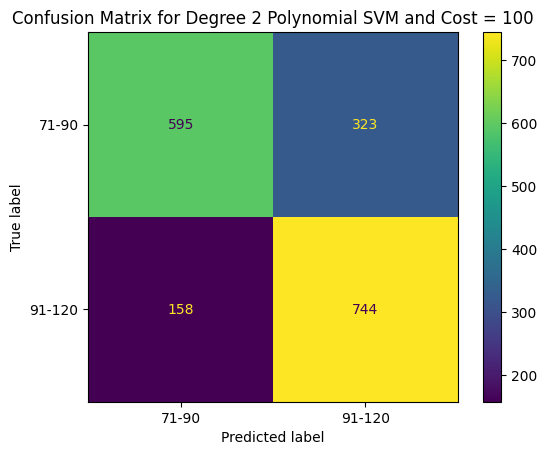

In [22]:
# Training Degree 2 Polynomial SVM
poly_svm = SVC(kernel='poly', degree = 2, C= 100)
poly_svm.fit(X_train, y_train)

# Predicting test set
poly_y_pred = poly_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, poly_y_pred))
print(classification_report(y_test, poly_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, poly_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for Degree 2 Polynomial SVM and Cost = 100")
plt.show()

### RBF

Accuracy: 0.8054945054945055
              precision    recall  f1-score   support

       71-90       0.72      1.00      0.84       918
      91-120       1.00      0.61      0.76       902

    accuracy                           0.81      1820
   macro avg       0.86      0.80      0.80      1820
weighted avg       0.86      0.81      0.80      1820



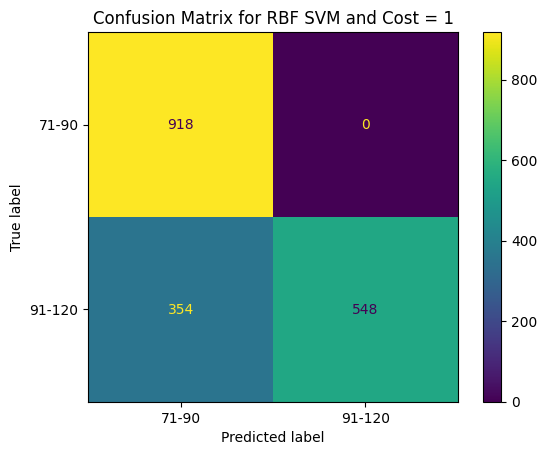

In [23]:
# Training RBF SVM
rbf_svm = SVC(kernel='rbf', C= 1)
rbf_svm.fit(X_train, y_train)

# Predicting test set
rbf_y_pred = rbf_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, rbf_y_pred))
print(classification_report(y_test, rbf_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, rbf_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for RBF SVM and Cost = 1")
plt.show()

Accuracy: 0.9203296703296703
              precision    recall  f1-score   support

       71-90       0.89      0.96      0.92       918
      91-120       0.96      0.88      0.92       902

    accuracy                           0.92      1820
   macro avg       0.92      0.92      0.92      1820
weighted avg       0.92      0.92      0.92      1820



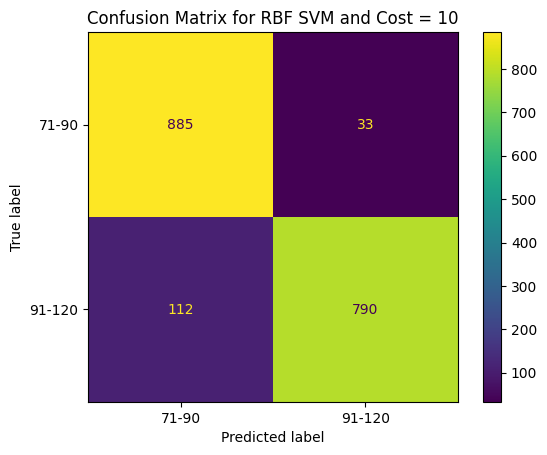

In [24]:
# Training RBF SVM
rbf_svm = SVC(kernel='rbf', C= 10)
rbf_svm.fit(X_train, y_train)

# Predicting test set
rbf_y_pred = rbf_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, rbf_y_pred))
print(classification_report(y_test, rbf_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, rbf_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for RBF SVM and Cost = 10")
plt.show()



Accuracy: 0.971978021978022
              precision    recall  f1-score   support

       71-90       1.00      0.94      0.97       918
      91-120       0.95      1.00      0.97       902

    accuracy                           0.97      1820
   macro avg       0.97      0.97      0.97      1820
weighted avg       0.97      0.97      0.97      1820



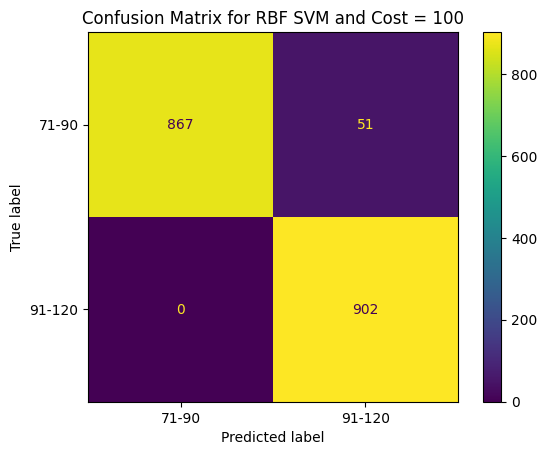

In [57]:
# Training RBF SVM
rbf_svm = SVC(kernel='rbf', C= 100)
rbf_svm.fit(X_train, y_train)

# Predicting test set
rbf_y_pred = rbf_svm.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, rbf_y_pred))
print(classification_report(y_test, rbf_y_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(y_test, rbf_y_pred, display_labels=le.classes_)
plt.title("Confusion Matrix for RBF SVM and Cost = 100")
plt.show()




## 2-D Visualizations

/Users/copelandlaris/Documents/Spring 2025/Machine Learning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


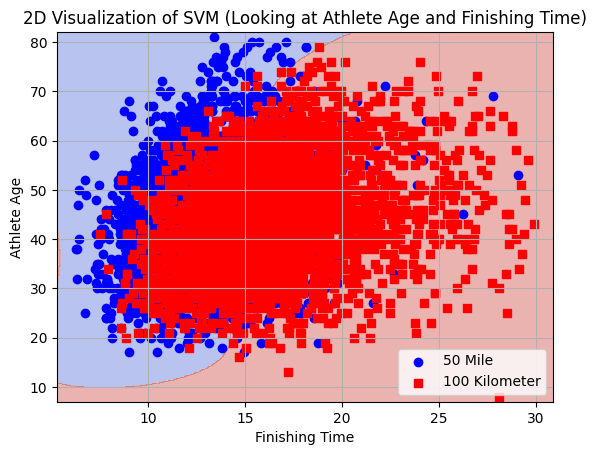

In [69]:
#2D Plot

feat_idx = [2, 1]
X_2d = X_train.iloc[:, feat_idx]  

# Train SVM again on just the selected 2 features for visualization
clf_2d = SVC(kernel='rbf', C = 100)
clf_2d.fit(X_2d, y_train)

# Create a mesh to plot decision boundary
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Plot original points
for label, marker, color in zip([0, 1], ['o', 's'], ['blue', 'red']):
    plt.scatter(
        X_2d[y_train == label].iloc[:, 0],
        X_2d[y_train == label].iloc[:, 1],
        marker=marker, color=color, label= '50 Mile' if label == 0 else '100 Kilometer'
    )

plt.xlabel('Finishing Time')
plt.ylabel('Athlete Age')
plt.title('2D Visualization of SVM (Looking at Athlete Age and Finishing Time)')
plt.legend()
plt.grid(True)
plt.show()


/Users/copelandlaris/Documents/Spring 2025/Machine Learning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


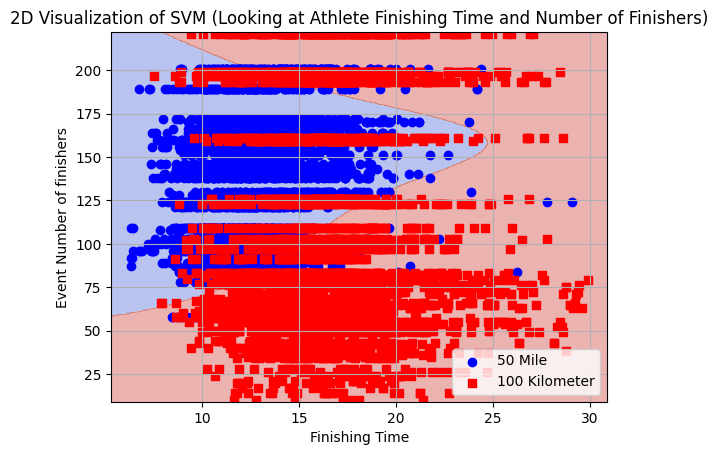

In [67]:
#2D Plot

feat_idx = [2, 0]
X_2d = X_train.iloc[:, feat_idx]  

# Train SVM again on just the selected 2 features for visualization
clf_2d = SVC(kernel='rbf', C = 100)
clf_2d.fit(X_2d, y_train)

# Create a mesh to plot decision boundary
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Plot original points
for label, marker, color in zip([0, 1], ['o', 's'], ['blue', 'red']):
    plt.scatter(
        X_2d[y_train == label].iloc[:, 0],
        X_2d[y_train == label].iloc[:, 1],
        marker=marker, color=color, label= '50 Mile' if label == 0 else '100 Kilometer'
    )

plt.xlabel('Finishing Time')
plt.ylabel('Event Number of finishers')
plt.title('2D Visualization of SVM (Looking at Athlete Finishing Time and Number of Finishers)')
plt.legend()
plt.grid(True)
plt.show()


/Users/copelandlaris/Documents/Spring 2025/Machine Learning/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


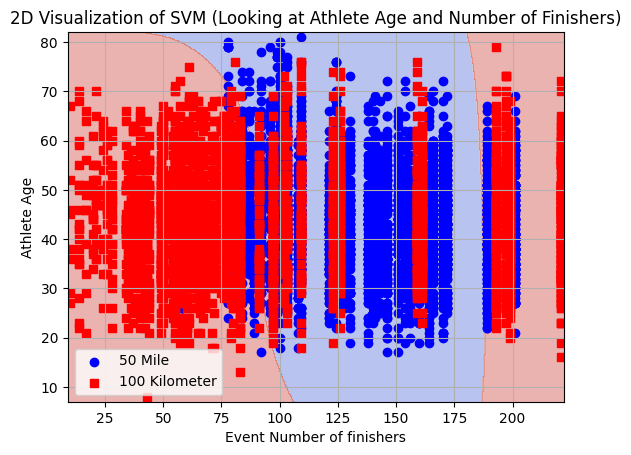

In [68]:
#2D Plot

feat_idx = [0, 1]
X_2d = X_train.iloc[:, feat_idx]  

# Train SVM again on just the selected 2 features for visualization
clf_2d = SVC(kernel='rbf', C = 100)
clf_2d.fit(X_2d, y_train)

# Create a mesh to plot decision boundary
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# Plot original points
for label, marker, color in zip([0, 1], ['o', 's'], ['blue', 'red']):
    plt.scatter(
        X_2d[y_train == label].iloc[:, 0],
        X_2d[y_train == label].iloc[:, 1],
        marker=marker, color=color, label= '50 Mile' if label == 0 else '100 Kilometer'
    )

plt.xlabel('Event Number of finishers')
plt.ylabel('Athlete Age')
plt.title('2D Visualization of SVM (Looking at Athlete Age and Number of Finishers)')
plt.legend()
plt.grid(True)
plt.show()
